### Vary initial temperature, check RSC result

In [1]:
import numpy as np
import scipy.constants as cts
import scipy.stats as stats
import gc
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
from scipy.special import hermite, factorial
import RSC_sim
from pathos.multiprocessing import Pool

### Original sequence

In [2]:
sequence = RSC_sim.load_sequence('../sequences/original.txt')
temps = np.linspace(10e-6, 100e-6, 20)

In [3]:
ground_state_rates = []
ses_ground = []
survive_rates = []
ses_survive = []
n_bars = []
ses_nbar = []
for temp in temps:
    mol_list = RSC_sim.initialize_thermal([temp, temp, temp], 1000)
    n_bar, survive_rate, ground_state_rate, se_nbar, se_survive, se_ground = RSC_sim.apply_raman_sequence(mol_list, sequence)
    ground_state_rates.append(ground_state_rate[-1])
    survive_rates.append(survive_rate[-1])
    n_bars.append(n_bar[-1])
    ses_ground.append(se_ground[-1])
    ses_survive.append(se_survive[-1])
    ses_nbar.append(se_nbar[-1])

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:45<00:00, 22.07it/s]


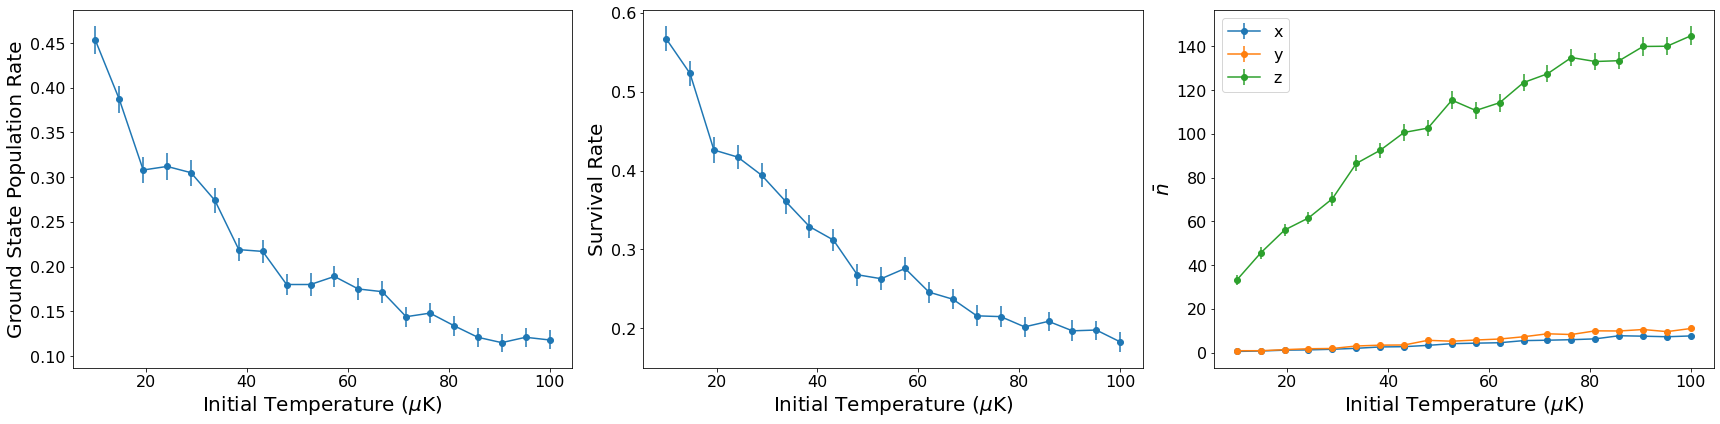

In [4]:
label_fs = 20   # axis label font size
tick_fs  = 16   # tick label font size
legend_fs = 16  # legend font size

fig, ax = plt.subplots(1, 3, figsize=(24, 6))

ax[0].errorbar(temps*1e6, ground_state_rates, ses_ground, marker='o')
ax[0].set_xlabel(r'Initial Temperature ($\mu$K)', fontsize=label_fs)
ax[0].set_ylabel('Ground State Population Rate', fontsize=label_fs)
ax[0].tick_params(axis='both', labelsize=tick_fs)

ax[1].errorbar(temps*1e6, survive_rates, ses_survive, marker='o')
ax[1].set_xlabel(r'Initial Temperature ($\mu$K)', fontsize=label_fs)
ax[1].set_ylabel('Survival Rate', fontsize=label_fs)
ax[1].tick_params(axis='both', labelsize=tick_fs)

ax[2].errorbar(temps*1e6, np.array(n_bars)[:,0], np.array(ses_nbar)[:,0], marker='o', label='x')
ax[2].errorbar(temps*1e6, np.array(n_bars)[:,1], np.array(ses_nbar)[:,1], marker='o', label='y')
ax[2].errorbar(temps*1e6, np.array(n_bars)[:,2], np.array(ses_nbar)[:,2], marker='o', label='z')
ax[2].legend(fontsize=legend_fs)
ax[2].set_xlabel(r'Initial Temperature ($\mu$K)', fontsize=label_fs)
ax[2].set_ylabel(r'$\bar{n}$', fontsize=label_fs)  # or 'n_bar' if you prefer plain text
ax[2].tick_params(axis='both', labelsize=tick_fs)

plt.tight_layout()
